<a href="https://colab.research.google.com/github/MAU143429/IA-Laboratorios/blob/main/Laboratorio_Indices_de_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio – Índices de error

In [ ]:
'''
Importando las librerías que nos permiten generar los valores aleatorios
y realizar los calculos.
'''
import random
import decimal
import statistics
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


1. Genere un set de datos con comportamiento lineal (puede utilizar una librería
para generar este set) de 100 mil datos, calcule la regresión lineal. Puede
reutilizar los datos del lab de Regresión Lineal (5 pts)


2. Calcule diferentes índices de error sobre la regresión. Los algoritmos deben ser
programados por usted. No se permite que utilice métodos ya programados de
librerías. 

*   Calcule el Error Medio Absoluto (MAE). (20 pts)





*   Calcule el Error Medio Cuadrático (MSE). (20 pts)

*   Calcule el Root Mean Squared Error (RMSE). (20 pts)


Gráfique en 2D las observaciones y sus errores como se muestra en la siguiente
figuera (10 pts)

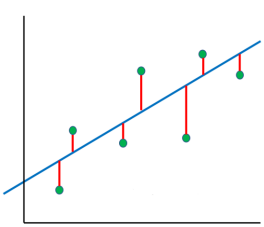

Saque conclusiones a partir de los índices de error calculados en este laboratorio.
Sea analítico y extensivo en sus conclusiones.(25 pts)